## Face Detection using MTCNN
This notebook is a tutorial on how to use MTCNN to extract faces and features from pictures.

MTCNN is the state-of-the-art technique to extract face and other facial features including nose, mouth and eyes. It is a very popular and powerful technique used in pre-processing for Face Recognition tasks. MTCNN can also be used for Facial Landmark Detection.

Here, we will use on opensource implementation of MTCNN to extract the face, and other features and draw bounding boxed around them.

In [3]:
# install mtcnn package
!pip install mtcnn

In [4]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [67]:
# to upload your picture to google colab working directory
from google.colab import files
uploaded=files.upload()


Saving ali-yahya-MyfSxRrKN9E-unsplash.jpg to ali-yahya-MyfSxRrKN9E-unsplash.jpg


Shape of image/array: (3840, 5760, 3)


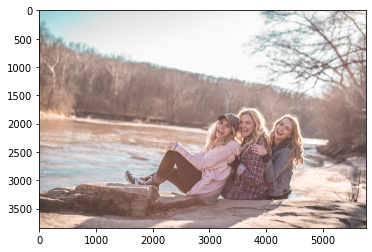

In [75]:
import matplotlib.pyplot as plt
# load image from file
filename = "courtney-cook-DixBunyDi1k-unsplash.jpg"
image = plt.imread(filename)
print("Shape of image/array:",image.shape)
imgplot = plt.imshow(image)
plt.show()


In [36]:
!pip install pprint

In [76]:
from pprint import pprint

detector = mtcnn.MTCNN()

# detect faces in the image
faces = detector.detect_faces(image)

for face in faces:
    pprint(face)


{'box': [3516, 1844, 271, 368],
 'confidence': 0.999936580657959,
 'keypoints': {'left_eye': (3563, 1984),
               'mouth_left': (3560, 2109),
               'mouth_right': (3682, 2117),
               'nose': (3586, 2055),
               'right_eye': (3684, 1991)}}
{'box': [4135, 1907, 336, 384],
 'confidence': 0.9998863935470581,
 'keypoints': {'left_eye': (4263, 2009),
               'mouth_left': (4182, 2121),
               'mouth_right': (4285, 2193),
               'nose': (4268, 2081),
               'right_eye': (4381, 2091)}}
{'box': [3126, 1891, 296, 345],
 'confidence': 0.9983262419700623,
 'keypoints': {'left_eye': (3210, 2000),
               'mouth_left': (3154, 2128),
               'mouth_right': (3259, 2173),
               'nose': (3214, 2075),
               'right_eye': (3329, 2050)}}
{'box': [3911, 2101, 16, 24],
 'confidence': 0.70500648021698,
 'keypoints': {'left_eye': (3915, 2109),
               'mouth_left': (3914, 2119),
               'mouth_right':

In [77]:
# draw an image with detected objects
def draw_boundingbox(filename, result_list):

    # load the image
    data = plt.imread(filename)
    
    # plot the image
    plt.imshow(data)

    # get the context for drawing boxes
    ax = plt.gca()

    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']

        # create the shape
        box = plt.Rectangle((x, y), width, height, fill=False, color='orange')

        # draw the box
        ax.add_patch(box)

    # show the plot
    plt.show()

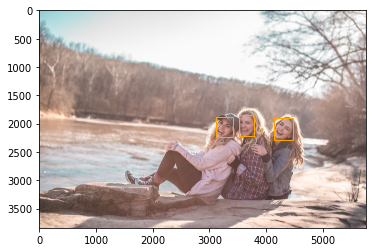

In [78]:
# draw bounding boxes on the original image
draw_boundingbox(filename, faces)

In [79]:
# draw an image with detected objects
def draw_facebox(filename, result_list):

    # load the image
    data = plt.imread(filename)

    # plot the image
    plt.imshow(data)

    # get the context for drawing boxes
    ax = plt.gca()

    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']

        # create the shape
        box = plt.Rectangle((x, y), width, height,fill=False, color='orange')

        # draw the box
        ax.add_patch(box)

        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot (radius of dot = 2% of the width)
            radius = 0.02 * width
            dot = plt.Circle(value, radius=radius, color='red')

            ax.add_patch(dot)
            # show the plot
    return plt
    # plt.show()
    


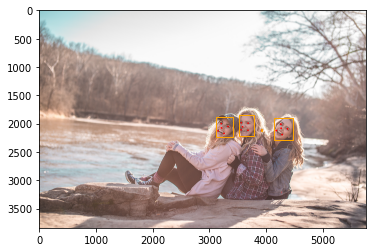

In [81]:
# display faces on the original image
plt = draw_facebox(filename, faces)
plt.savefig("./girls.png")
plt.show()